In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time
from matplotlib.colors import ListedColormap
import tqdm

In [0]:
def dist(X, Y):
  return -2* np.dot(X, Y.T) + np.sum(Y ** 2, axis=0)

def middle(X):
  return np.sum(X, axis=0) / np.size(X, axis=0)

def kMeans(scope, K):
  change = True
  axis0 = np.size(scope, 0)
  axis1 = np.size(scope, 1)
  print(axis0, axis1)
  target = np.zeros(axis0)
  centroids = np.zeros((K, axis1))
  for i in range(K):
    centroids[i] = scope[random.randint(0, axis0-1)] 
  while change:       
    change = False
    for i in range(axis0): ##pętla do tworzenia grup 
      minimum = math.inf
      group = -1
      for k in range(K):
        distance = dist(scope[i], centroids[k])     
        if distance < minimum:
          minimum = distance
          group = k
      if group != target[i]:
        change = True
        target[i] = group
    for k in range(K):
      centroids[k] = middle(scope[target==k])
  return centroids, target

def generate(N, d, K, p, mean, Sigma):
  mix = random.choices(range(K), weights=p, k=N)
  A = np.linalg.cholesky(Sigma)
  Z = np.random.randn(N, d)
  for i in range(N):
    Z[i] = mean[mix[i]] + np.dot(A[mix[i]], Z[i])

  return Z

zadanie 2)

1000000 100
czas:  951.2157924175262


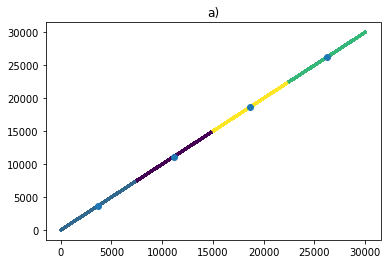

In [9]:
N = 1000000
d = 100
K = 1000
q = 10
p = np.ones(K) / K
Sigma = np.array([np.eye(d)] * K)
mean = q * (np.ones((K, d)).T * np.arange(1, K+1) * 3).T

data = generate(N, d, K, p, mean, Sigma)
czas = time.time()
centra, targets = kMeans(data, 4)
print('czas: ', time.time() - czas)

X = data[:, 0]
Y = data[:, 1]

plt.title('a)')
plt.scatter(X, Y, c=targets, marker='o', linewidth=0, s=7)
plt.scatter(centra[:, 0], centra[:, 1])
plt.show()